# IMPORTAMOS LIBRERIAS

In [1]:
import time
#import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn

### CARGAMOS NUESTROS DATOS

In [17]:
data_station = pd.read_csv('Temperatura_Station.csv')
data_patron = pd.read_csv('Temperatura_Patron.csv')

### ASIGNAMOS TITUTLOS A CADA COLUMNA

In [18]:
data_station.columns = ['Unix', 'Temperatura']
data_patron.columns = ['Dia','Hora','Temperatura']

In [19]:
data_station = pd.DataFrame(data_station)
data_patron = pd.DataFrame(data_patron)

# PATRON

In [20]:
New_Data_Patron = []
for i in range(len(data_patron['Dia'])):
    hora = data_patron['Hora'][i][:-2].split(':')
    jor = data_patron['Hora'][i][-1]
    #print (hora,jor)
    if ( jor == 'a' ):
        if ( int(hora[0]) == 12 ):
            hora[0] = 0
            date = data_patron['Dia'][i][:6] + '2017' + ' ' + str(hora[0]) + ':' + str(hora[1])
            #print (date)
            p1 = datetime.strptime(date, "%d/%m/%Y %H:%M")
            p2 = p1.timetuple()
            p3 = time.mktime(p2)
            Datos = [p1, p3,data_patron['Temperatura'][i]]
            New_Data_Patron.append(Datos)
            #data_patron['Dia'][i] = date
        if ( int(hora[0]) < 12 ):
            hora[0] = hora[0]
            date = data_patron['Dia'][i][:6] + '2017' + ' ' + str(hora[0]) + ':' + str(hora[1])
            #print (date)
            #Time.append(date)
            #data_patron['Dia'][i] = date
            p1 = datetime.strptime(date, "%d/%m/%Y %H:%M")
            p2 = p1.timetuple()
            p3 = time.mktime(p2)
            Datos = [p1, p3,data_patron['Temperatura'][i]]
            New_Data_Patron.append(Datos)
    if ( jor == 'p' ):
        if ( int(hora[0]) < 12 ):
            hora[0] = int(hora[0]) + 12
            date = data_patron['Dia'][i][:6] + '2017' + ' ' + str(hora[0]) + ':' + str(hora[1])
            #print (date)
            #Time.append(date)
            #data_patron['Dia'][i] = date
            p1 = datetime.strptime(date, "%d/%m/%Y %H:%M")
            p2 = p1.timetuple()
            p3 = time.mktime(p2)
            Datos = [p1, p3,data_patron['Temperatura'][i]]
            New_Data_Patron.append(Datos)
        if ( int(hora[0]) == 12 ):
            hora[0] = hora[0]
            date = data_patron['Dia'][i][:6] + '2017' + ' ' + str(hora[0]) + ':' + str(hora[1])
            #print (date)
            #Time.append(date)
            #data_patron['Dia'][i] = date
            p1 = datetime.strptime(date, "%d/%m/%Y %H:%M")
            p2 = p1.timetuple()
            p3 = time.mktime(p2)
            Datos = [p1, p3,data_patron['Temperatura'][i]]
            New_Data_Patron.append(Datos)
        

In [21]:
New_Data_Patron = pd.DataFrame(New_Data_Patron)
New_Data_Patron.columns = ['Date_Plot','Unix','Temperatura']

(array([736669., 736670., 736671., 736672., 736673., 736674., 736675.,
        736676., 736677., 736678., 736679.]),
 <a list of 11 Text xticklabel objects>)

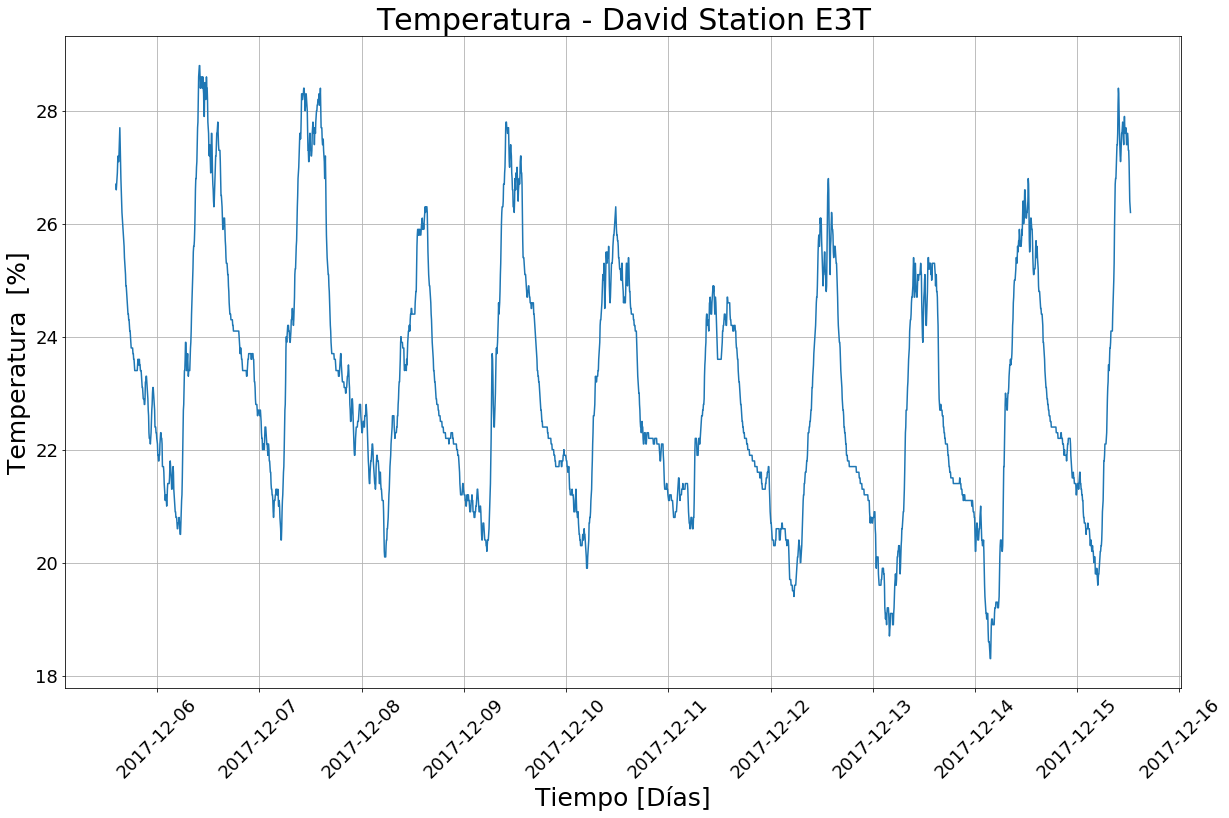

In [22]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura - David Station E3T',fontsize=30)
plt.plot(New_Data_Patron['Date_Plot'],New_Data_Patron['Temperatura'])
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)

# RACIMO 2

In [23]:
import datetime
New_Data_Station = []
for i in range(len(data_station['Unix'])):
    U = int(data_station['Unix'][i]) + 176400
    p1 = datetime.datetime.fromtimestamp(U)
    Datos = [p1, U, data_station['Temperatura'][i]]
    New_Data_Station.append(Datos)

In [24]:
New_Data_Station = pd.DataFrame(New_Data_Station)

In [25]:
New_Data_Station.columns = ['Date_Plot','Unix','Temperatura']

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]), <a list of 7 Text xticklabel objects>)

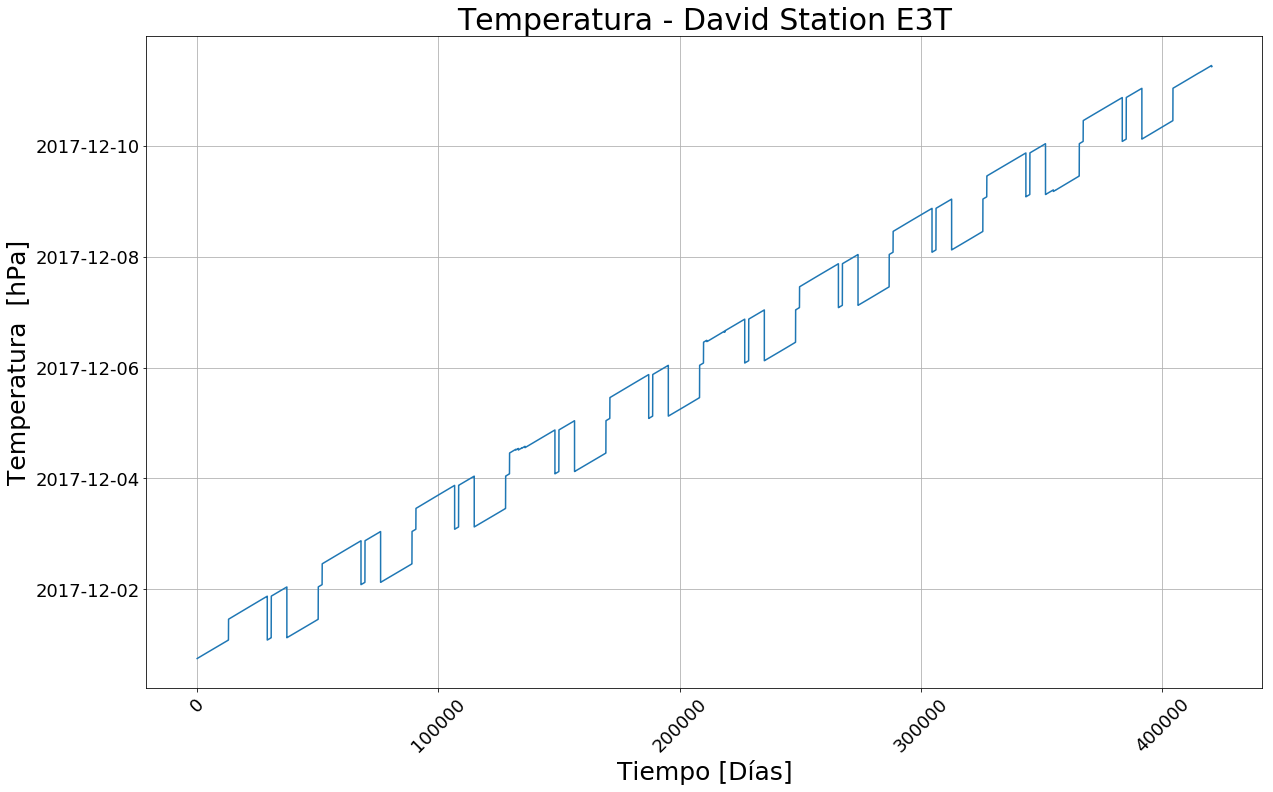

In [26]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura - David Station E3T',fontsize=30)
plt.plot(New_Data_Station['Date_Plot'])
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [hPa]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)

In [27]:
for i in range(len(New_Data_Station['Unix'])):
    if ( int(New_Data_Station['Unix'][i]) == 0 ):
        print (i,New_Data_Station['Unix'][i])

# COMPARACION

In [28]:
def find_nearest(vector,value):
    vector = np.array(vector)
    idx = (np.abs(vector-value)).argmin()
    return idx

In [29]:
Temperatura = []
for i in range(int((len(New_Data_Patron['Unix'])/2))):
    idx = find_nearest(New_Data_Station['Unix'],New_Data_Patron['Unix'][i])
    to_plot = [New_Data_Patron['Date_Plot'][i], New_Data_Patron['Temperatura'][i],New_Data_Station['Temperatura'][idx]]
    Temperatura.append(to_plot)

In [30]:
Temperatura = pd.DataFrame(Temperatura)

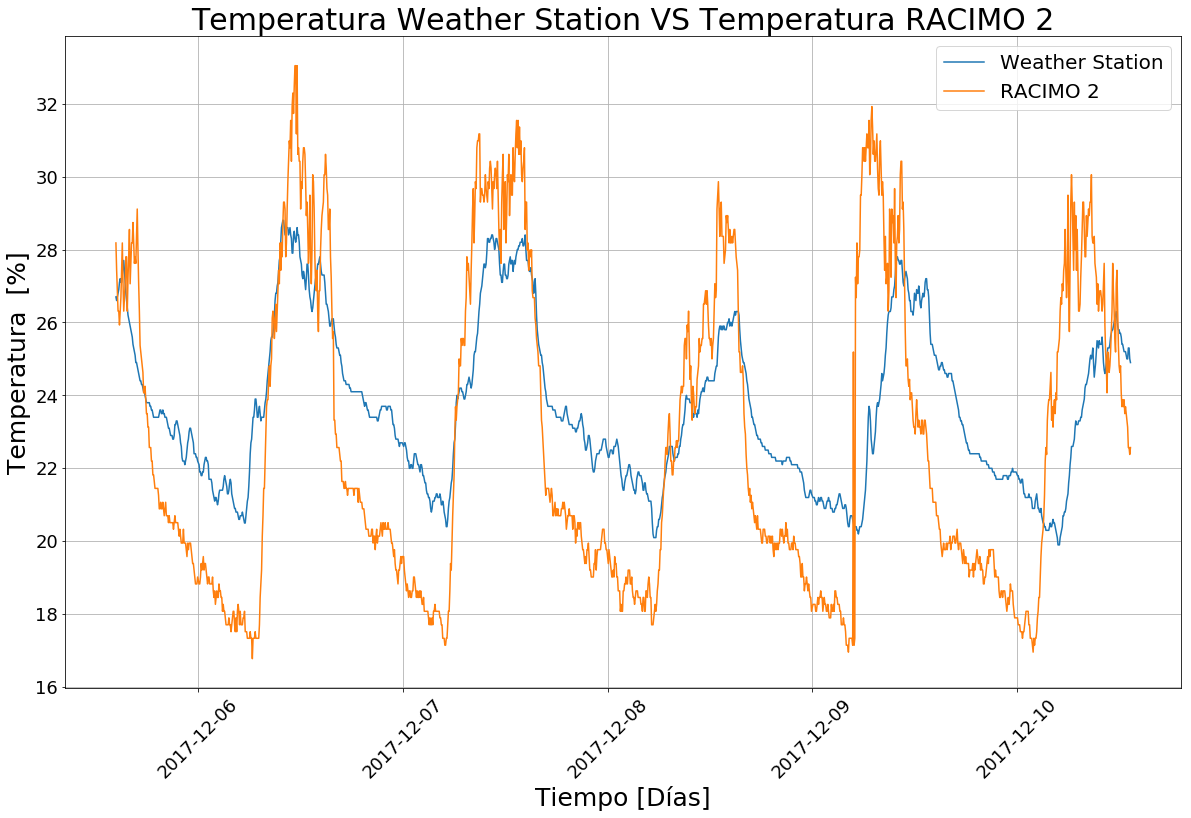

In [31]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura Weather Station VS Temperatura RACIMO 2',fontsize=30)
plt.plot(Temperatura[0],Temperatura[1],label='Weather Station')
plt.plot(Temperatura[0],Temperatura[2],label='RACIMO 2')
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('Comparacion1_Datos_Crudos.eps')

In [32]:
def suaviza(vector,porcentaje):
    # Guardamos en en "vector" los datos que deseamos suavizar
    #vector = halley[:,1]
    vector = list(vector)

    # Establecemos una ventana y lo que hara el codigo copiar del mismo ancho de la ventana datos
    # Al comienzo y al final para luego contatenarlos, antes y despues
    # Luego suma del ancho antes y depues del punto en el cual estoy parado
    # y sacamos el promedio de dichos datos

    final_vector = []
    #ancho_ventana = 500
    ancho_ventana = round((porcentaje/100)*len(vector))
    vector_por_suavizar = vector[:ancho_ventana] + vector + vector[-ancho_ventana:]
    for i in range(len(vector_por_suavizar)):
        if (i >= ancho_ventana and i <= int(len(vector_por_suavizar)) - ancho_ventana -1):
            #print (vector_por_suavizar[i])
            suma_acumulada = 0
            top = 2*ancho_ventana + 1
            #print (vector_por_suavizar[i],top)
            for j in range(i-ancho_ventana,i+ancho_ventana+1):
                #print (j)
                suma_acumulada = suma_acumulada + vector_por_suavizar[j]
                #print ('Elemento a suma:',vector_por_suavizar[i+j-1])
            final_vector.append(suma_acumulada*(1/top))
            #print ('Suma',suma_acumulada*(1/top))
            #vector_por_suavizar[i] = suma_acumulada
    #final_vector = vector_por_suavizar[ancho_ventana:-ancho_ventana]
    return final_vector, ancho_ventana

    #Todos los vectores arreglados se guardaran en final_vector

In [33]:
Temperatura_suavizada,AV = suaviza(Temperatura[2],0.95)

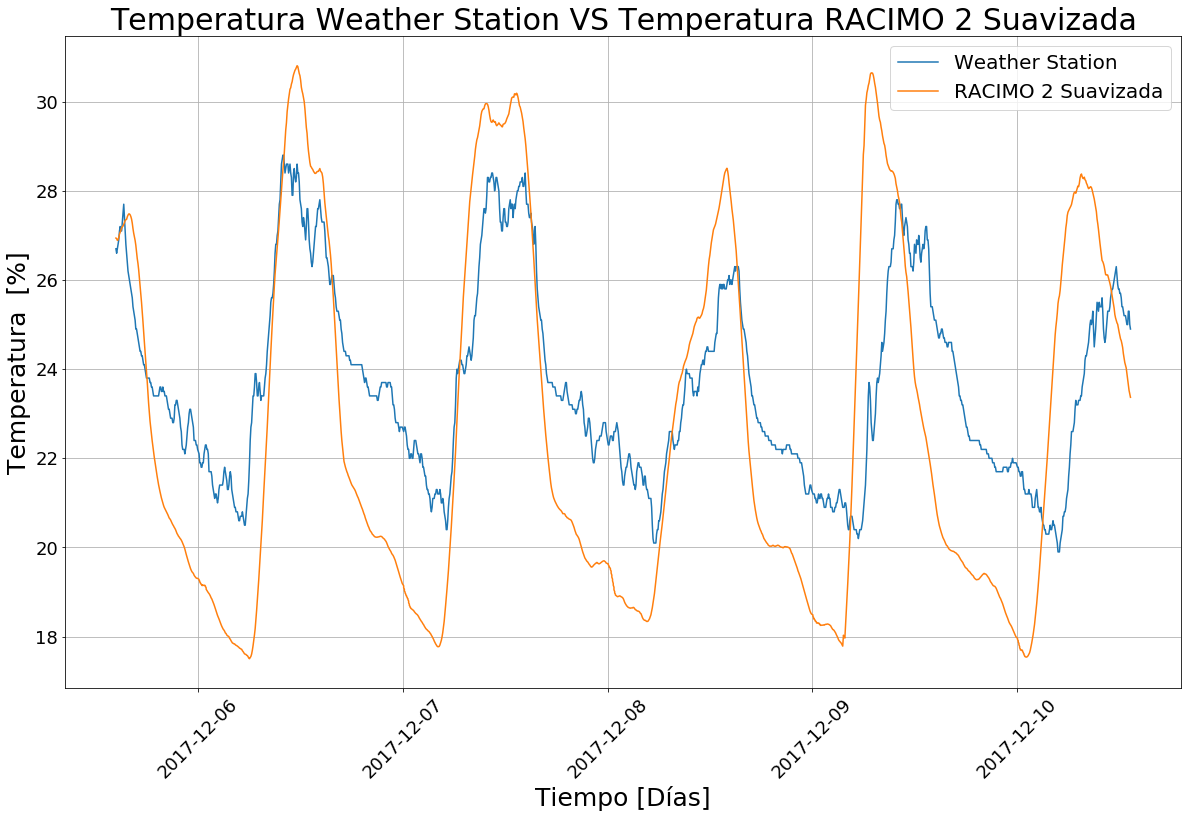

In [34]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura Weather Station VS Temperatura RACIMO 2 Suavizada',fontsize=30)
plt.plot(Temperatura[0],Temperatura[1],label='Weather Station')
plt.plot(Temperatura[0],Temperatura_suavizada,label='RACIMO 2 Suavizada')
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('Comparacion2_Datos_Suavizados.eps')

In [35]:
AV

14

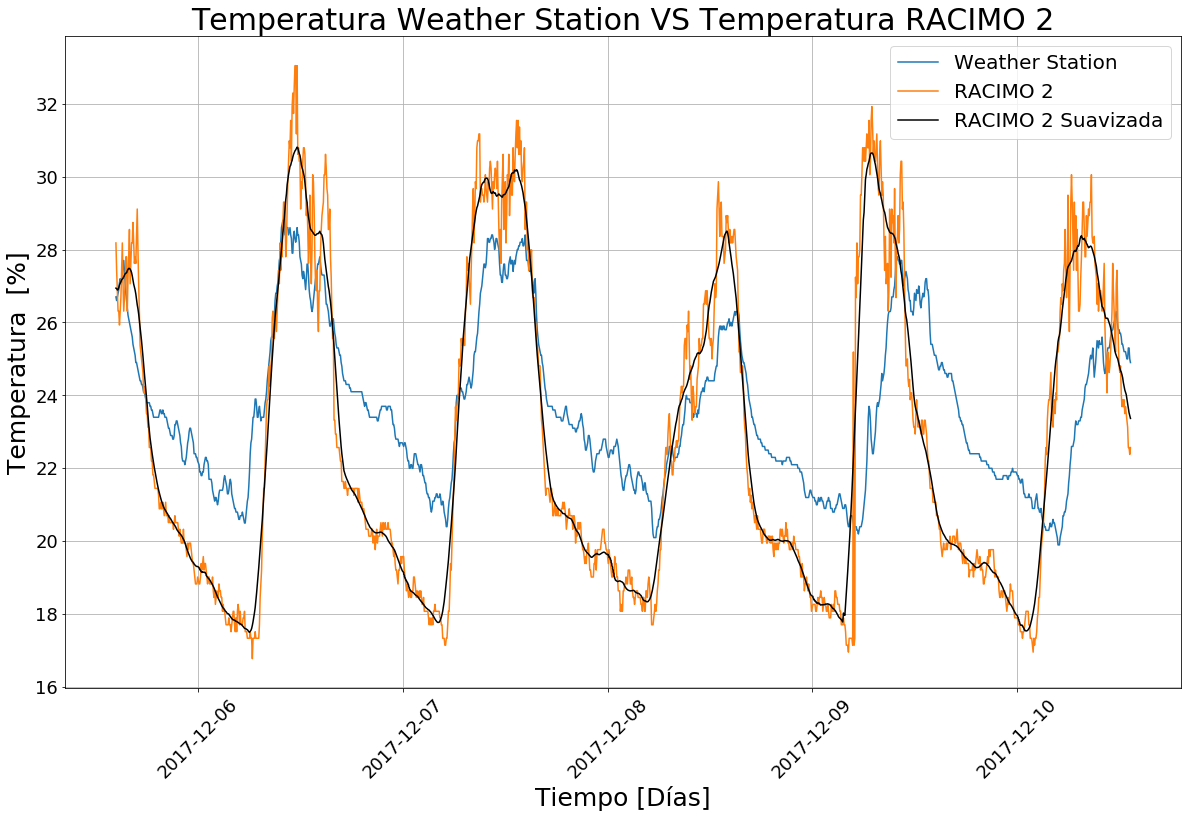

In [36]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura Weather Station VS Temperatura RACIMO 2',fontsize=30)
plt.plot(Temperatura[0],Temperatura[1],label='Weather Station')
plt.plot(Temperatura[0],Temperatura[2],label='RACIMO 2')
plt.plot(Temperatura[0],Temperatura_suavizada,label='RACIMO 2 Suavizada',color='k')
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('Comparacion3_Datos_Crudos_savizados_patron.eps')

# ERROR

In [37]:
error2 = ((Temperatura[1] - Temperatura_suavizada)/(Temperatura[1]))*100

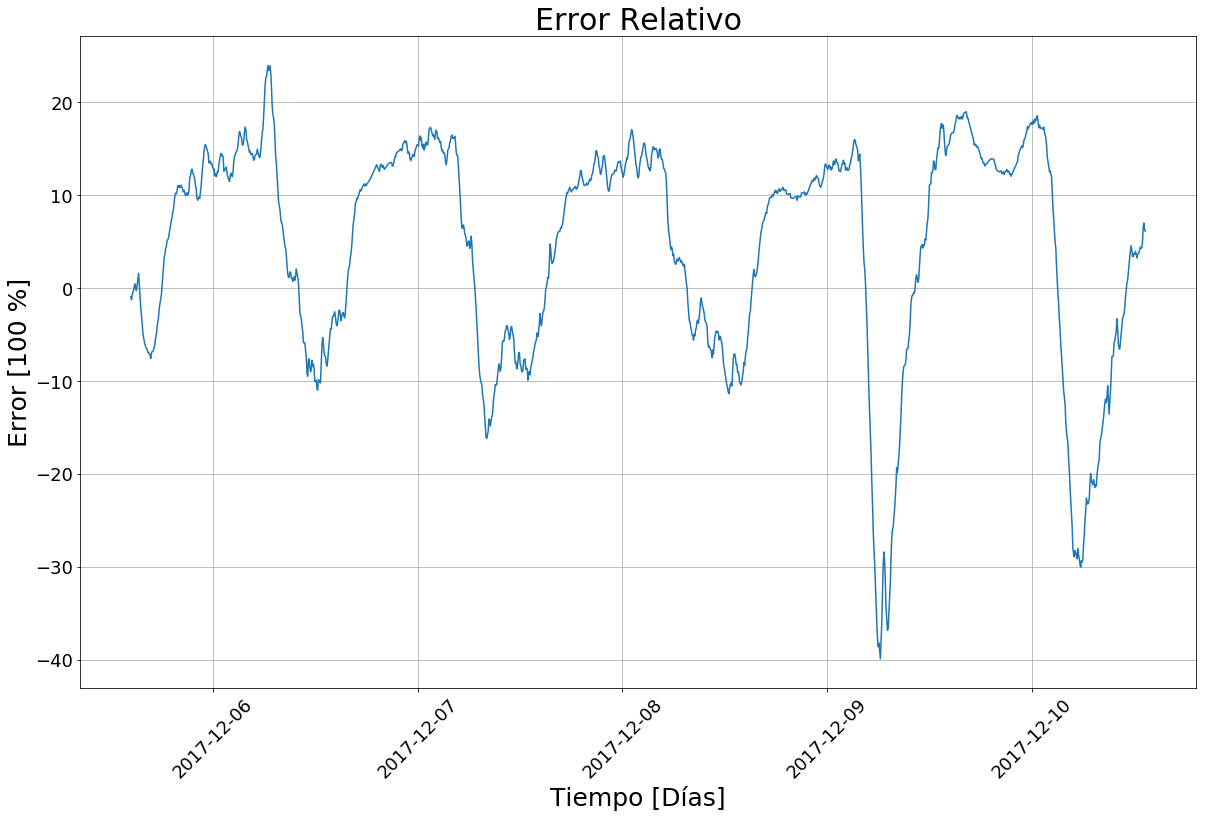

In [38]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Error Relativo',fontsize=30)
plt.plot(Temperatura[0],error2)
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Error [100 %]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
#plt.legend(fontsize=20)
plt.savefig('error1.eps')

# MACHINE LEARNING

In [39]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [40]:
Target = pd.DataFrame(Temperatura[1])    #PATRON
Data = pd.DataFrame(Temperatura_suavizada)      #ESTACION A CALIBRAR

In [41]:
lm.fit(Data,Target)
LinearRegression(copy_X=True,fit_intercept=True,normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
Int = float(lm.intercept_)
Int

14.190340970100145

In [43]:
Coe = float(lm.coef_)
Coe

0.41649336964928474

In [44]:
Score = lm.score(Data, Target)
Score

0.5866410578214305

In [45]:
Temperatura_Corregida = []
for i in range(len(Temperatura_suavizada)):
    Value = Int + Coe*Temperatura_suavizada[i]
    Temperatura_Corregida.append(Value)

In [46]:
Temperatura_Corregida = pd.DataFrame(Temperatura_Corregida)

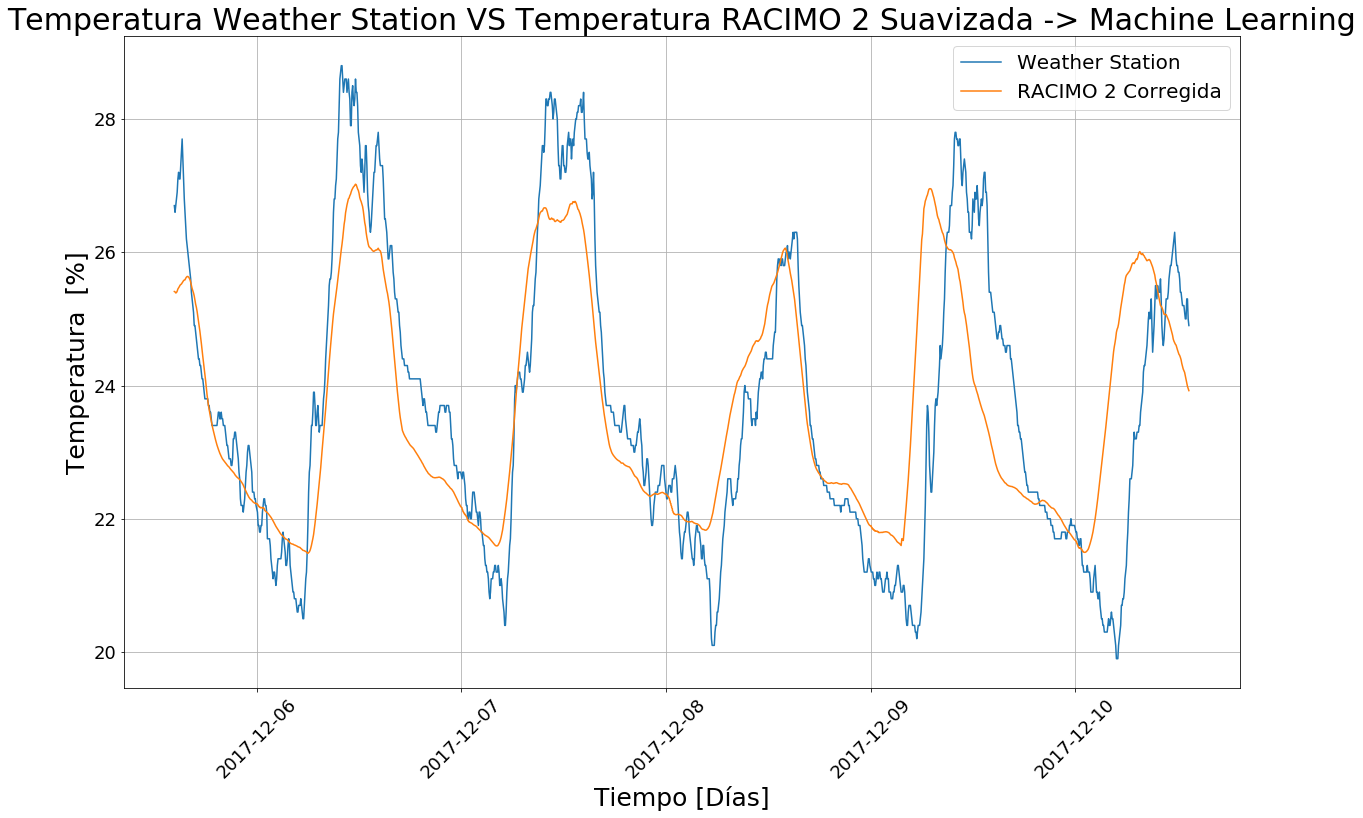

In [47]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Temperatura Weather Station VS Temperatura RACIMO 2 Suavizada -> Machine Learning',fontsize=30)
plt.plot(Temperatura[0],Temperatura[1],label='Weather Station')
plt.plot(Temperatura[0],Temperatura_Corregida,label='RACIMO 2 Corregida')
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Temperatura  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('Comparacion3_Machine_Learning.eps')

# ERROR

In [48]:
error3 = ((Temperatura[1] - Temperatura_Corregida)/(Temperatura[1]))*100

In [ ]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Error Relativo',fontsize=30)
plt.plot(Temperatura[0],error3)
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Error [100 %]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('error_machine_learning.eps')

No handles with labels found to put in legend.


# PROMEDIANDO

In [80]:
import numpy as np

In [82]:
mean_patron = np.mean(Humedad[1])

In [83]:
mean_patron

79.79310344827586

In [84]:
mean_station = np.mean(Humedad_suavizada)

In [85]:
mean_station

72.307926604649

In [86]:
Delta = mean_patron - mean_station
Delta

7.48517684362686

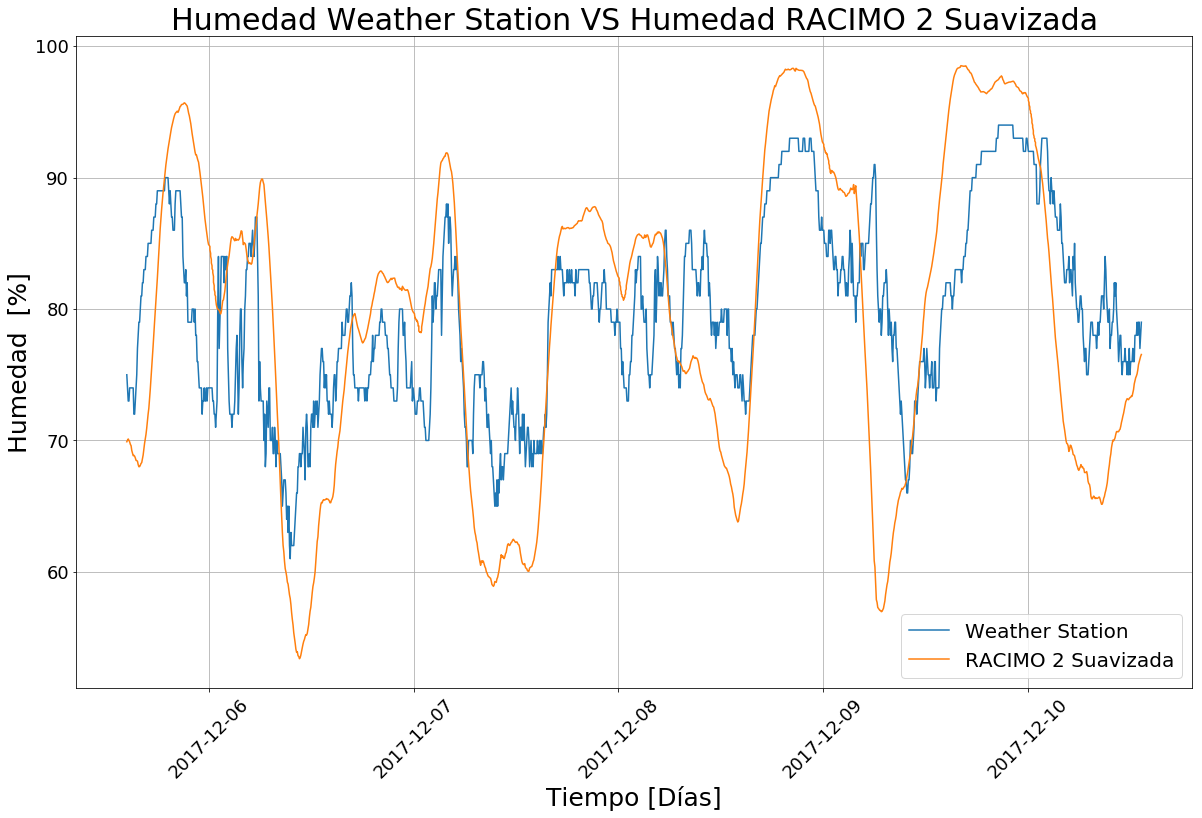

In [87]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Humedad Weather Station VS Humedad RACIMO 2 Suavizada',fontsize=30)
plt.plot(Humedad[0],Humedad[1],label='Weather Station')
plt.plot(Humedad[0],Humedad_suavizada+Delta,label='RACIMO 2 Suavizada')
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Humedad  [%]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('Comparacion2_Datos_Suavizados_Delta.eps')

In [89]:
error4 = ((Humedad[1] - Humedad_Corregida+Delta)/(Humedad[1]))*100

No handles with labels found to put in legend.


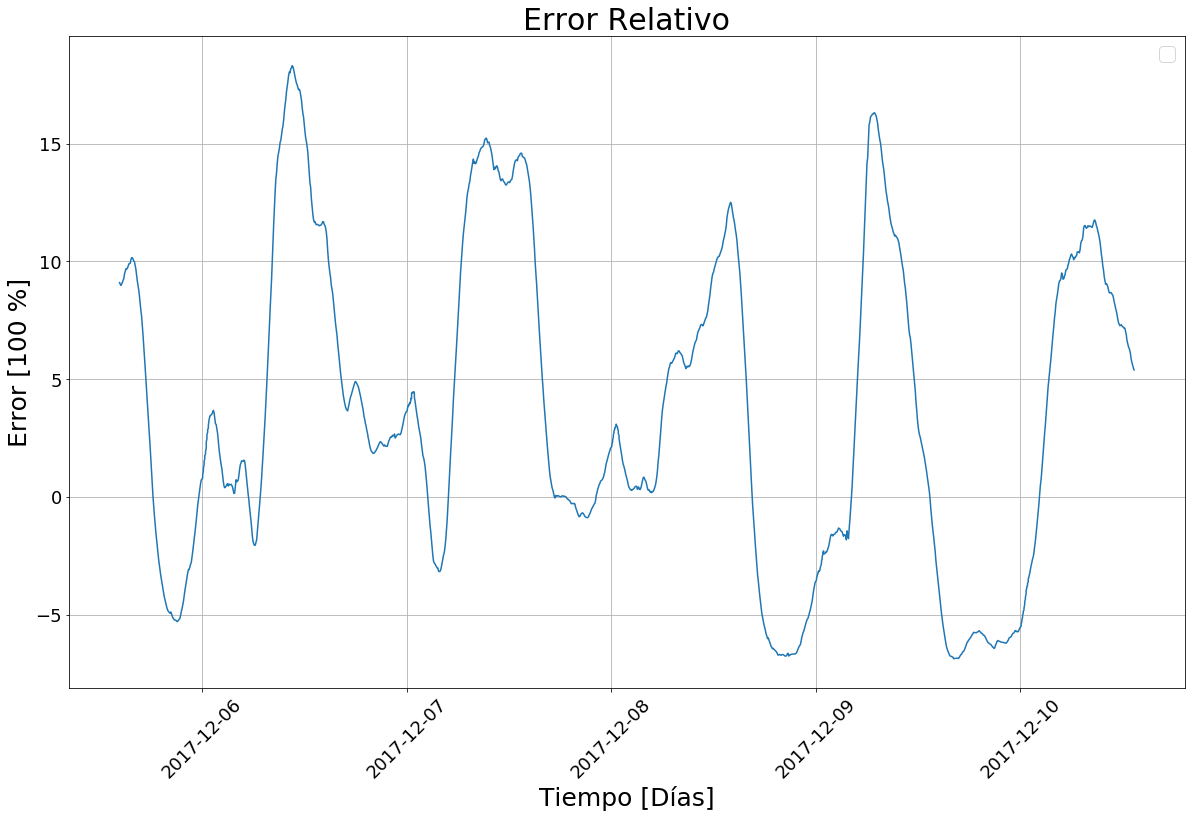

In [92]:
plt.figure(figsize=(20,12))
plt.grid()
plt.title('Error Relativo',fontsize=30)
plt.plot(Humedad[0],error4)
plt.xlabel('Tiempo [Días]',fontsize=25)
plt.ylabel('Error [100 %]',fontsize=25)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.xticks(rotation=45)
plt.legend(fontsize=20)
plt.savefig('error_promedio_delta.eps')